# Predictive Modeling Example

In this notebook we will look at identifying an underlying relationship between a single input variable and a target. In modeling notebook reviewed in the last class, we looked only at a linear model (1st order polynomial). As discussed (and demonstrated) in last classes lecture, we often find relationships that cannot be described as linear. 

In this notebook we focus on demonstrating how we can explore models of 1st, 2nd and 3rd ordere polynomials (but, we can easily extend this code for any order polynomial). 

## Step 1: Import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Step 2: Load the given data that we will model

In [2]:
df = pd.read_csv('class03_polynomial_dataset.csv')

df.head(10)

,input,target
0,32.49,1757.27515
1,-12.24,-461.96360
2,-10.56,226.63040
3,-21.46,471.29740
4,17.31,185.19915
5,-46.03,2662.08635
6,34.90,1838.65500
7,-15.22,401.73260
8,6.38,243.93660
9,-4.99,384.60515


Since we know that we will be testing a 1st, 2nd and 3rd order polynomial, we will need to create the x squared and x cubed input terms

In [3]:
df['input_squared']=df['input']**2
df['input_cubed']=df['input']**3

In [4]:
df.head(5)

,input,target,input_squared,input_cubed
0,32.49,1757.27515,1055.6001,34296.447249
1,-12.24,-461.96360,149.8176,-1833.767424
2,-10.56,226.63040,111.5136,-1177.583616
3,-21.46,471.29740,460.5316,-9883.008136
4,17.31,185.19915,299.6361,5186.700891


## Step 3: Partition the data into a training and validation set 

In this notebook, we will incorporate data partitioning. As discussed in last class, data partitioning can help us better identify a model and avoid overfitting the data. 

In this example, we use the sklearn train_test_splot function to partition our data into a training a validation set. The validation data set will be used to guage how well each model performs as a predictive model by testing the model on data that wasn't used in training. 

In [5]:
# partition data
X = df[['input', 'input_squared', 'input_cubed']] # store our X (input) values in X
y = df['target'] # store our target values in y
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1) # develop a two partition split with 70% for training, and 30% for validation testing.

Let's explore the training data set using a scatter plot diagram...

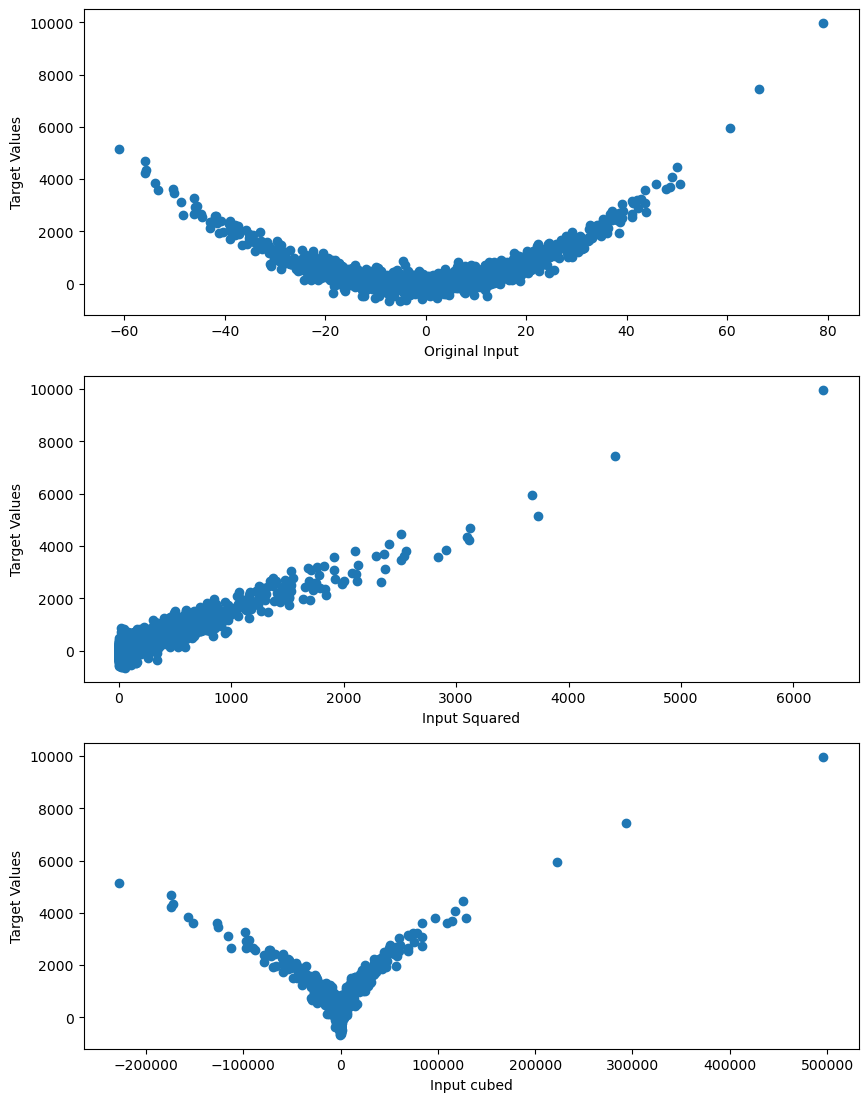

In [6]:
fig, ax = plt.subplots(3, figsize=(10, 13.5))

ax[0].scatter(x = df['input'], y = y)
ax[0].set_xlabel("Original Input")
ax[0].set_ylabel("Target Values")

ax[1].scatter(x = df['input_squared'], y = y)
ax[1].set_xlabel("Input Squared")
ax[1].set_ylabel("Target Values")

ax[2].scatter(x = df['input_cubed'], y = y)
ax[2].set_xlabel("Input cubed")
ax[2].set_ylabel("Target Values")

plt.show()



Even before fitting any of our models, we can see that this is most likely a 2nd order polynomial relationship (notice how input square seems to have an almost perfect linear reltionship with the target).

## Step 5: Have three models 'compete' to be the best model

For this example I demonstrate the process of fitting a 1st, 2nd and 3rd order polynomial. 

### 1st order polynomial

We use the training data to fit our linear model...

In [7]:
lin_reg1=LinearRegression().fit(train_X[['input']],train_y)

And, now, display the identified model and it's score (using r squared).

In [8]:
print(f"Y = {lin_reg1.intercept_:.3f} + {lin_reg1.coef_[0]:.3f}x")
r2_1st_order = lin_reg1.score(valid_X[['input']], valid_y)
print(f"coefficient of determination: {r2_1st_order:.8f}")

Y = 598.690 + 7.849x
coefficient of determination: 0.00568046


### 2nd order polynomial

For the second order polynomial, we will use X containing both input and input_squared values...

In [9]:
 lin_reg2=LinearRegression().fit(train_X[['input', 'input_squared']],train_y)

Display the model coefficients found and the r squared value (a measure of fit, also call the 'coefficient of determiniation')

In [10]:
print(f"Y = {lin_reg2.intercept_:.3f} + {lin_reg2.coef_[0]:.3f}x + {lin_reg2.coef_[1]:.6f}x^2")
r2_2nd_order = lin_reg2.score(valid_X[['input', 'input_squared']], valid_y)
print(f"coefficient of determination: {r2_2nd_order:.8f}")

Y = -2.775 + 6.614x + 1.520627x^2
coefficient of determination: 0.91969052


### 3rd order polynomial

To test a 3rd order polynomal, we basically follow the same process that we did in the second order example -- with a few modifications.

Fit this model to the training data...

In [11]:
 lin_reg3=LinearRegression().fit(train_X[['input', 'input_squared', 'input_cubed']],train_y)

Display the model parameters found and the performance of the model (using r squared)...

In [12]:
print(f"Y = {lin_reg3.intercept_:.3f} + {lin_reg3.coef_[0]:.3f}x + {lin_reg3.coef_[1]:.3f}x^2 + {lin_reg3.coef_[2]:6f}x^3")
r2_3rd_order = lin_reg3.score(valid_X[['input', 'input_squared', 'input_cubed']], valid_y)
print(f"coefficient of determination: {r2_3rd_order:.8f}")

Y = -1.830 + 6.317x + 1.519x^2 + 0.000232x^3
coefficient of determination: 0.91975058


## Step 6: Explore how well each model performs on the validation data using scatterplot diagrams

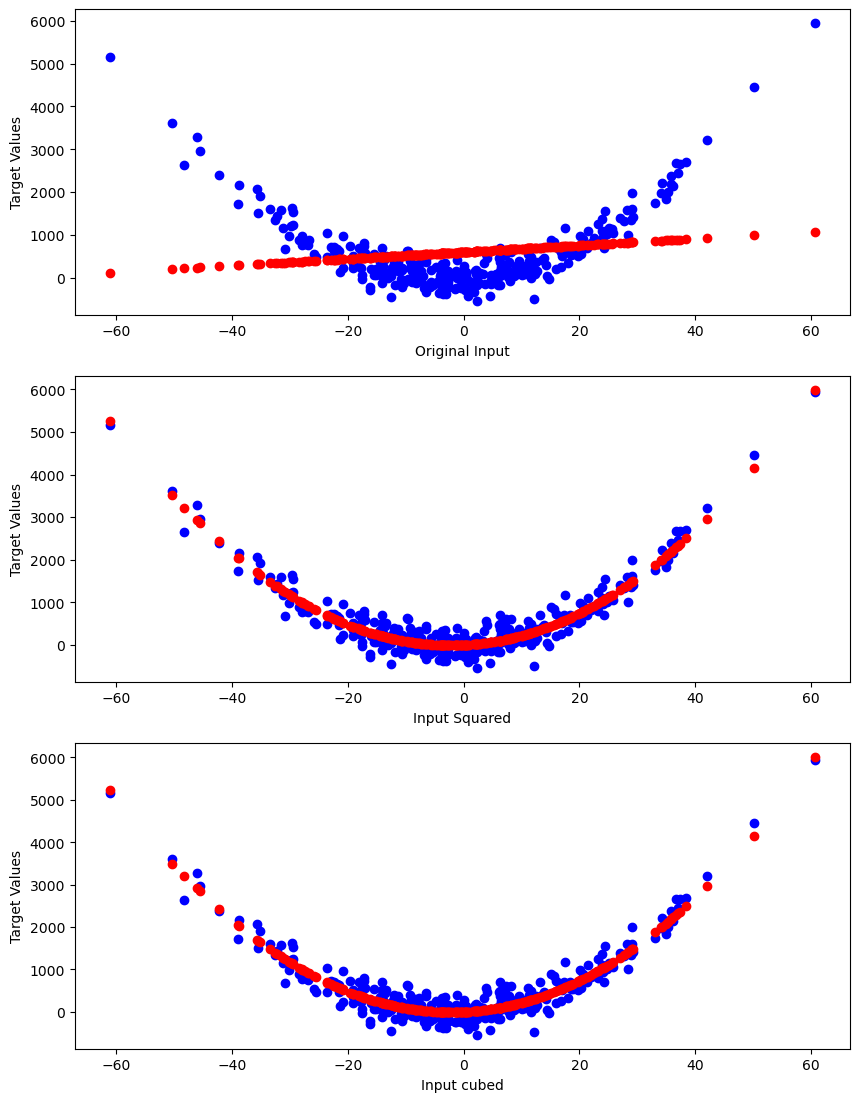

In [13]:
fig, ax = plt.subplots(3, figsize=(10, 13.5))

ax[0].scatter(x = valid_X[['input']], y = valid_y, color='blue')
ax[0].scatter(x = valid_X[['input']], y = lin_reg1.predict(valid_X[['input']]), color='red')
ax[0].set_xlabel("Original Input")
ax[0].set_ylabel("Target Values")

ax[1].scatter(x = valid_X[['input']], y = valid_y, color='blue')
ax[1].scatter(x = valid_X[['input']], y = lin_reg2.predict(valid_X[['input', 'input_squared']]), color='red')
ax[1].set_xlabel("Input Squared")
ax[1].set_ylabel("Target Values")

ax[2].scatter(x = valid_X[['input']], y = valid_y, color='blue')
ax[2].scatter(x = valid_X[['input']], y = lin_reg3.predict(valid_X[['input', 'input_squared', 'input_cubed']]), color='red')
ax[2].set_xlabel("Input cubed")
ax[2].set_ylabel("Target Values")

plt.show()



## Step 7: Select the 'best' model

Let's look at the r squared value of each of the models performance on the test data...

In [14]:
print(f"{'1st order model':18s}{r2_1st_order:>.8f}")
print(f"{'2nd order model':18s}{r2_2nd_order:>.8f}")
print(f"{'3rd order model':18s}{r2_3rd_order:>.8f}")

1st order model   0.00568046
2nd order model   0.91969052
3rd order model   0.91975058


As we discussed in class 2, the 'best' model is the model the performs best on the test data. When two (or more) of the models perform close to each other, then choose the simplest model.

Our results indicate that both the second and third order models fit the data well, but the 2nd order is simpler, therefore, it is the model we select. 